In [ ]:
import tarfile

# 압축 파일 경로
file_path = "/content/cifar-10-python.tar.gz"

# 압축 해제
with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall(path="upload")

In [ ]:
import pickle
import numpy as np

# 파일 로드 함수 정의
def load_cifar10_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'data'], dict[b'labels']

# 데이터셋 경로
data_path = "/content/upload/cifar-10-batches-py/"

# 데이터 배치 로드
train_data = []
train_labels = []

for i in range(1, 6):
    data, labels = load_cifar10_batch(data_path + f"data_batch_{i}")
    # data와 labels가 numpy 배열로 처리되도록 보장
    train_data.append(np.array(data))
    train_labels.append(np.array(labels))

# numpy 배열로 변환
train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)

# 테스트 데이터 로드
test_data, test_labels = load_cifar10_batch(data_path + "test_batch")

# numpy 배열로 변환 (테스트 데이터도 동일하게 처리)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# 데이터 확인
print(f"Train data shape: {train_data.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train data shape: (50000, 3072)
Train labels shape: (50000,)
Test data shape: (10000, 3072)
Test labels shape: (10000,)


In [ ]:
# 레이블 이름 로드 함수 정의
def load_label_names(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'label_names']

# 레이블 이름 로드
label_names = load_label_names(data_path + "batches.meta")
label_names = [name.decode('utf-8') for name in label_names]

# 결과 확인
print("Label Names:", label_names)

Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


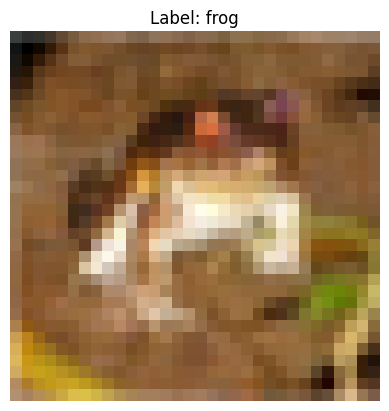

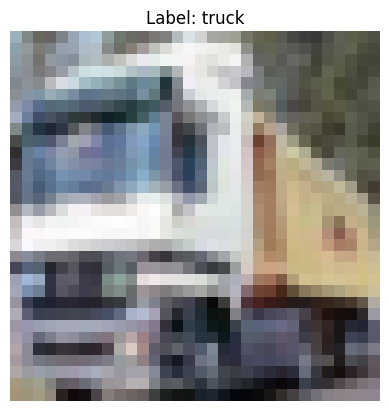

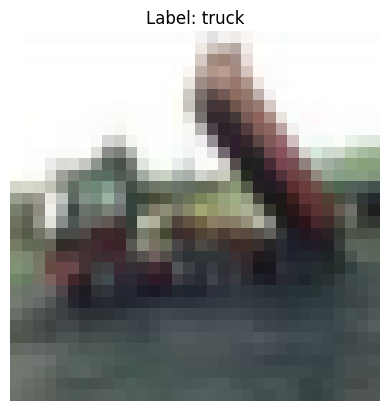

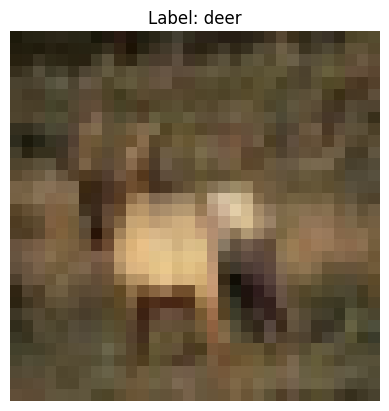

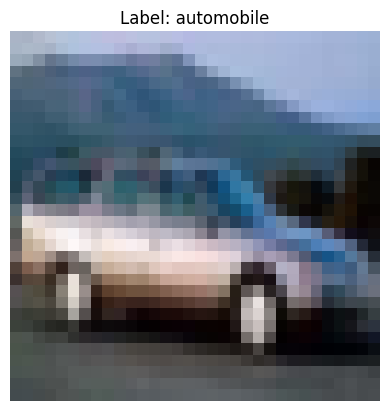

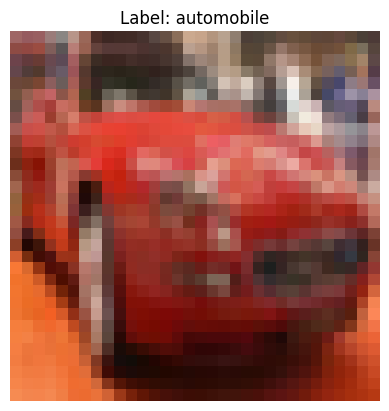

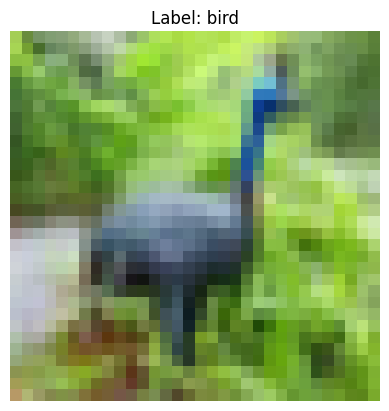

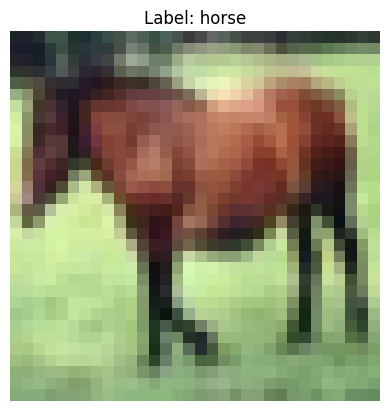

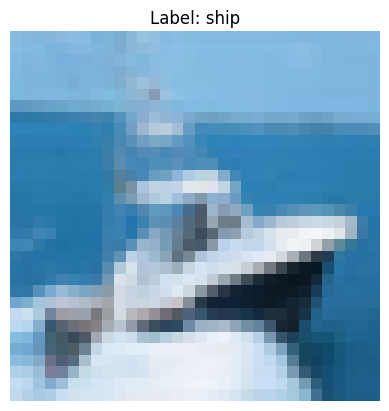

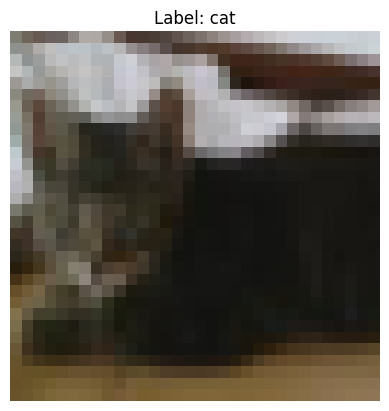

In [ ]:
# 데이터 구조 시각화
import matplotlib.pyplot as plt

# CIFAR-10 이미지는 3072차원(32x32x3)으로 저장되어 있으므로 재구성 필요
def show_image(data, labels, index, label_names):
    """
    CIFAR-10 이미지를 시각화하는 함수.

    :param data: CIFAR-10 이미지 데이터 (numpy 배열, 3072차원)
    :param labels: CIFAR-10 레이블 데이터
    :param index: 시각화할 이미지의 인덱스
    :param label_names: CIFAR-10 클래스 이름 리스트
    """
    image = data[index].reshape(3, 32, 32).transpose(1, 2, 0)  # 채널 순서 변경
    plt.imshow(image)
    plt.title(f"Label: {label_names[labels[index]]}")  # 레이블 이름 표시
    plt.axis('off')
    plt.show()

# CIFAR-10 클래스 이름
label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

# 데이터 시각화
show_image(train_data, train_labels, 0, label_names)
show_image(train_data, train_labels, 1, label_names)
show_image(train_data, train_labels, 2, label_names)
show_image(train_data, train_labels, 3, label_names)
show_image(train_data, train_labels, 4, label_names)
show_image(train_data, train_labels, 5, label_names)
show_image(train_data, train_labels, 6, label_names)
show_image(train_data, train_labels, 7, label_names)
show_image(train_data, train_labels, 8, label_names)
show_image(train_data, train_labels, 9, label_names)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# 데이터 정규화 (0~255 범위를 0~1로 스케일링)
train_data = train_data / 255.0
test_data = test_data / 255.0

# 레이블을 One-hot 인코딩
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# 데이터 확인
print(f"Train data shape: {train_data.shape}")
print(f"Train labels shape: {train_labels.shape}")

Train data shape: (50000, 3072)
Train labels shape: (50000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN 모델 설계
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # 과적합 방지
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10의 10개 클래스
])

# 모델 요약 출력
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(train_data.reshape(-1, 32, 32, 3), train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_data.reshape(-1, 32, 32, 3), test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.4710 - loss: 1.4850 - val_accuracy: 0.5474 - val_loss: 1.3224
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 97ms/step - accuracy: 0.4972 - loss: 1.4192 - val_accuracy: 0.5488 - val_loss: 1.2860
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.5139 - loss: 1.3696 - val_accuracy: 0.5804 - val_loss: 1.2285
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.5304 - loss: 1.3309 - val_accuracy: 0.5861 - val_loss: 1.1902
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 91ms/step - accuracy: 0.5401 - loss: 1.3034 - val_accuracy: 0.5828 - val_loss: 1.1890
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.5474 - loss: 1.2821 - val_accuracy: 0.6035 - val_loss: 1.1469
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.5556 - loss: 1.2629 - val_accuracy: 0.6054 - val_loss: 1.1437
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.5614 - loss: 1.2442 - 

In [ ]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(test_data.reshape(-1, 32, 32, 3), test_labels)
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6185 - loss: 1.0802
Test accuracy: 0.6176000237464905


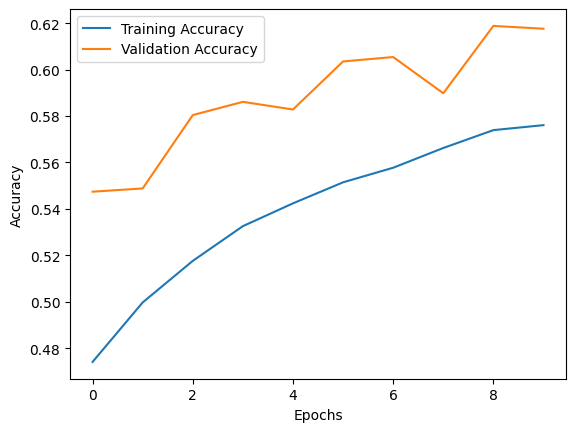

In [ ]:
import matplotlib.pyplot as plt

# 학습 정확도 및 손실 곡선
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()